<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-02-04-tree-based-models-bagging-extremely-randomized-trees-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 2.4 Extremely Randomized Trees (Extra Trees)

Extremely Randomized Trees (Extra Trees) is a machine learning ensemble method that builds multiple decision trees and combines their predictions to improve accuracy and robustness. It is an extension of the Random Forest algorithm, introduced by Pierre Geurts et al. in 2006, and is designed to further reduce variance and computational complexity by introducing additional randomization.

## Overview

Extra Trees is a powerful ensemble learning method that builds multiple decision trees and combines their predictions. It is particularly effective for high-dimensional datasets and can handle both classification and regression tasks. The key idea behind Extra Trees is to introduce more randomness into the tree-building process, which helps to reduce overfitting and improve generalization.

Key Features:

1. **Random Feature Selection**: Picks random subset of features at each node.
2. **Random Split Thresholds**: Chooses split points randomly, not optimally.
3. **Ensemble Aggregation**: Combines tree predictions (voting for classification, averaging for regression).
4. **No Bootstrap (Optional)**: Uses full dataset per tree, unlike Random Forest.
5. **Low Variance**: High randomization reduces tree correlation.
6. **Fast Training**: Random splits make it quicker than Random Forest.
7. **Noise Robust**: Handles noisy data well.

**Pros**: Fast, robust, less overfitting.  
**Cons**: Slightly less accurate than Random Forest, less interpretable.  
**Uses**: Classification, regression on noisy or high-dimensional data.


### How Extra Trees Works

Extra Trees builds an ensemble of decision trees using a highly randomized approach. The key steps in the Extra Trees algorithm are as follows:

1. Ensemble of Decision Trees

-   Extra Trees builds a collection of decision trees, where each tree is trained on a subset of the data (or the entire dataset, depending on configuration).

-   The final prediction is made by aggregating the outputs of all trees:

  -   `Classification`: Majority voting across all trees.

  -   `Regression`: Averaging the predictions of all trees.

    -   

   Lets denote:

  -   $T$: Number of trees in the ensemble.

  -   $D$: Training dataset with $n$ samples and $m$ features, $D = \{(x_i, y_i)\}_{i=1}^n$, where $x_i$ is a feature vector and $y$ is the target (class label for classification or continuous value for regression).

   -   Each tree $t \in \{1, 2, \dots, T\}$ produces a prediction \$h_t(x)% for an input ( x ).

-   For **classification**:

   -   The final prediction is the majority vote:

$$ \hat{y}(x) = \text{mode} \{ h_1(x), h_2(x), \dots, h_T(x) \} $$

where \#\text{mode}\$ selects the most frequent class across all trees.

-   For `regression`:

   -   The final prediction is the average:

$$ \hat{y}(x) = \frac{1}{T} \sum_{t=1}^T h_t(x) $$

where $h_t(x)$ is the output of the ( t )-th tree.

-   The ensemble reduces variance by combining predictions from multiple trees, which are intentionally diversified through randomization (explained in later steps).

2. Randomized Feature Selection

-   At each node of a decision tree, Extra Trees selects a random subset of features (similar to Random Forests).

-   Unlike Random Forests, which evaluate all possible splits for these features to find the best one (e.g., based on Gini impurity or information gain), Extra Trees picks a split randomly without optimizing.

-   At each node:

-   Select a random subset of $k$ features from the total $m$ features (typically $k = \sqrt{m}$ for classification or $k = m/3$ for regression, though this can be tuned).

-   For each feature in this subset, a random split point is chosen (see Step 3).
    
-   Let $F = \{f_1, f_2, \dots, f_m\}$ be the set of all features.

-   A random subset $F_{\text{node}} \subseteq F$ is chosen, where $|F_{\text{node}}| = k$.

-   No optimization is performed (unlike Random Forests, which minimize a criterion like Gini impurity):

$$ \text{Gini}(S) = 1 - \sum_{c=1}^C p_c^2 $$

or

$$ \text{Information Gain}(S, f) = H(S) - \sum_{v \in \text{values}(f)} \frac{|S_v|}{|S|} H(S_v) $$

where $H(S)$ is the entropy of set $S$, and $S_v$ is the subset of samples where feature $f$ takes value $v$. Extra Trees skips these calculations.

-   By avoiding the search for the optimal split, Extra Trees reduces computational cost, making it faster than Random Forests, especially for large datasets.

3. Randomized Splitting

-   For each feature in the random subset $F_{\text{node}}$, Extra Trees generates a random threshold within the feature’s range.

-   The split is chosen randomly among these thresholds without evaluating their quality (e.g., no comparison of Gini impurity or variance reduction).

-   For a feature $f_j \in F_{\text{node}}$:

  -   Compute the range of values for $f_j$ in the current node’s data: $[\text{min}(f_j), \text{max}(f_j)]$.

  -   Select a random threshold $\theta_j$) uniformly from this range:

$$ \theta_j \sim \text{Uniform}(\text{min}(f_j), \text{max}(f_j)) $$

-   The node splits the data into two subsets:

  -   Left: $\{ x \in S \mid f_j(x) \leq \theta_j \}$

   -   Right: $\{ x \in S \mid f_j(x) > \theta_j \}$

    -   Among the $k$ features in $F_{\text{node}}$, Extra Trees randomly selects one of the proposed splits (or sometimes uses a simple heuristic, like picking the first one, depending on the implementation).

\`- The split condition for a node is:

$$ \text{Split: } f_j(x) \leq \theta_j $$

-   No optimization criterion is computed, unlike Random Forests, which would evaluate:

$$  \text{Best split} = \arg\min_{f_j, \theta_j} \text{Criterion}(S_{\text{left}}, S_{\text{right}}) $$

where the criterion could be Gini impurity, entropy, or variance.

-   The random threshold selection introduces extra randomness, which helps decorrelate the trees further and reduces overfitting while maintaining predictive power.

4. Bootstrap Sampling (Optional)

-   Extra Trees can use bootstrap sampling (random sampling with replacement) to create different training subsets for each tree, similar to Random Forests.

-   Alternatively, Extra Trees often uses the entire training dataset for each tree (no bootstrapping), which is a key distinction from Random Forests and reduces variance further.

-   If bootstrap sampling is enabled:

  -   For each tree $t$, sample $n$ instances from $D$) with replacement to create a subset $D_t$.

  -   The probability that a sample $(x_i, y_i)$ is included in $D_t$ is:

$$  P(\text{included}) = 1 - \left(1 - \frac{1}{n}\right)^n \approx 1 - e^{-1} \approx 0.632 $$

-   Thus, about 63.2% of the data is used per tree, with some samples repeated.

-   If bootstrap sampling is disabled (common in Extra Trees):

    -   Each tree is trained on the full dataset $D$, i.e., $D_t = D$.

-   Using the full dataset (no bootstrapping) reduces variance because each tree sees all the data, but the randomization in feature selection and splitting ensures diversity among trees.

5. Aggregation

-   Once all $T$ trees are built, their predictions are combined to produce the final output.

-   This step is identical to Random Forests but relies on the highly randomized trees built in the previous steps.

-   For a new input $x$:

   -   Each tree $t$ produces a prediction $h_t(x)$.

   -   The final prediction is computed as:

- `Classification`:

$$ \hat{y}(x) = \text{mode} \{ h_1(x), h_2(x), \dots, h_T(x) \} $$

where the mode is the most frequent class label.

         
- `Regression`:


$$  \hat{y}(x) = \frac{1}{T} \sum_{t=1}^T h_t(x) $$

where the average of all tree predictions is taken.

-   The aggregation leverages the law of large numbers to produce a robust prediction, as the errors of individual trees (due to randomness) tend to cancel out.



Below is a flowchart summarizing the Extra Trees algorithm:

![alt text](http://drive.google.com/uc?export=view&id=1AOZtY5BD50W1qRERKfG-OBRakgl6GZqd)


### Key Differences from Random Forests

-   `More Randomness`: Extra Trees randomizes both feature splits and threshold selection, while Random Forests optimize splits based on a criterion (e.g., Gini or entropy).
-   `Faster Training`: Random split selection avoids computationally expensive optimization, making Extra Trees faster to train.
-   `Bias-Variance Tradeoff`: Extra Trees increases bias slightly (due to random splits) but reduces variance, which can lead to better generalization on noisy datasets.
-   `Overfitting`: Extra Trees is less prone to overfitting than Random Forests, especially when the dataset is small or noisy.

### Advantages

-   `Speed`: Faster training due to random split selection.
-   `Robustness`: Handles noisy data well and reduces overfitting.
-   `Simplicity`: Fewer hyperparameters to tune compared to other ensemble methods.
-   `Versatility`: Works for both classification and regression tasks.

### Disadvantages

-   `Less Interpretable`: Like Random Forests, the ensemble nature makes it harder to interpret individual trees.
-   `Slightly Higher Bias`: Random splits may lead to less optimal individual trees compared to optimized splits in Random Forests.
-   `Memory Usage`: Building many trees can be memory-intensive for large datasets.

### When to Use Extra Trees

-   When you need a fast, robust ensemble method for classification or regression.
-   When dealing with noisy or high-dimensional datasets.
-   When computational resources are limited, and training speed is a priority.
-   As an alternative to Random Forests when overfitting is a concern.

## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314977 sha256=f8f240d6368b73bc994799169bea20c4dc1cb0c0bc60c1bc6b0bc334dfb68083
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extra Trees from Scratch

Extra Trees can be implemented from scratch in R without relying on external packages. Below is a complete implementation for both classification and regression tasks using the Iris and BostonHousing datasets, respectively.


### Classification

This R code implements an **Extra Trees Classifier** on the Iris dataset using base R, without external packages. Here's a concise explanation:

1. **Dataset**: Uses the Iris dataset (`iris`), with features (sepal/petal measurements) and target (`Species`).

2. **Bootstrap Sampling**:
   - `bootstrap_sample`: Creates a random sample with replacement from the dataset (used if `use_bootstrap = TRUE`).

3. **Feature Selection**:
   - `select_features`: Randomly selects `k` features (default: square root of total features) for each node.

4. **Tree Building** (`build_tree`):
   - Builds a single decision tree with:
     - Random feature subset at each node.
     - Random split thresholds (using `runif` for random value within feature range).
     - Stops if max depth (`max_depth = 5`) or node size (`min_size = 5`) is reached.
     - Returns a leaf node with majority class if stopping criteria are met or no valid split is found.
     - Recursively builds left/right subtrees for valid splits.

5. **Prediction**:
   - `predict_tree`: Predicts class for a single row by traversing a tree based on feature thresholds.
   - `predict_extra_trees`: Combines predictions from all trees using majority voting.

6. **Main Function** (`extra_trees_classification`):
   - Builds `n_trees` (default: 100) decision trees.
   - Uses bootstrap sampling or full dataset based on `use_bootstrap`.

7. **Training/Testing**:
   - Splits Iris data into 70% training, 30% testing.
   - Trains model with 100 trees and bootstrap sampling.
   - Predicts on test set and computes accuracy.

8. **Evaluation**:
   - Outputs accuracy (proportion of correct predictions).
   - Prints a confusion matrix comparing predicted vs. actual classes.

**Key Extra Trees Traits**:
- Random feature selection and split thresholds reduce variance and computation.
- Ensemble of trees improves robustness.
- Optional bootstrap sampling (here, enabled).

In [ ]:
%%R
# Extra Trees Classification on Iris Dataset
# No external packages, base R only

# Load Iris dataset (assumed available in R environment)
data(iris)
iris_data <- iris

# Function to create a bootstrap sample
bootstrap_sample <- function(data) {
  n <- nrow(data)
  indices <- sample(1:n, n, replace = TRUE)
  return(data[indices, ])
}

# Function to select random features
select_features <- function(n_features, k) {
  sample(1:n_features, k, replace = FALSE)
}

# Function to build a single decision tree
build_tree <- function(data, max_depth = 5, min_size = 5) {
  build_node <- function(data, depth) {
    # Stop if max depth reached or node too small
    if (depth >= max_depth || nrow(data) <= min_size) {
      # Return leaf node with majority class
      classes <- table(data$Species)
      return(list(leaf = TRUE, prediction = names(which.max(classes))))
    }

    # Select random features (sqrt of total features)
    n_features <- ncol(data) - 1  # Exclude Species column
    k <- floor(sqrt(n_features))
    features <- select_features(n_features, k)

    # Find best random split
    best_feature <- NULL
    best_threshold <- NULL
    best_split <- NULL

    for (f in features) {
      # Get random threshold within feature range
      values <- data[[f]]
      threshold <- runif(1, min(values), max(values))

      # Split data
      left <- data[data[[f]] <= threshold, ]
      right <- data[data[[f]] > threshold, ]

      # Ensure non-empty splits
      if (nrow(left) > 0 && nrow(right) > 0) {
        best_feature <- f
        best_threshold <- threshold
        best_split <- list(left = left, right = right)
      }
    }

    # If no valid split, return leaf
    if (is.null(best_feature)) {
      classes <- table(data$Species)
      return(list(leaf = TRUE, prediction = names(which.max(classes))))
    }

    # Recursively build left and right subtrees
    left_tree <- build_node(best_split$left, depth + 1)
    right_tree <- build_node(best_split$right, depth + 1)

    return(list(
      leaf = FALSE,
      feature = best_feature,
      threshold = best_threshold,
      left = left_tree,
      right = right_tree
    ))
  }

  build_node(data, 0)
}

# Function to predict with a single tree
predict_tree <- function(tree, x) {
  if (tree$leaf) {
    return(tree$prediction)
  }

  if (x[tree$feature] <= tree$threshold) {
    return(predict_tree(tree$left, x))
  } else {
    return(predict_tree(tree$right, x))
  }
}

# Function to predict with the ensemble
predict_extra_trees <- function(trees, data) {
  predictions <- matrix(NA, nrow(data), length(trees))
  for (i in 1:length(trees)) {
    predictions[, i] <- apply(data, 1, function(x) predict_tree(trees[[i]], x))
  }

  # Majority voting
  apply(predictions, 1, function(row) {
    tbl <- table(row)
    names(which.max(tbl))
  })
}

# Main Extra Trees function
extra_trees_classification <- function(data, n_trees = 100, use_bootstrap = TRUE) {
  trees <- list()
  for (i in 1:n_trees) {
    # Use bootstrap sample or full dataset
    sample_data <- if (use_bootstrap) bootstrap_sample(data) else data
    trees[[i]] <- build_tree(sample_data)
  }
  return(trees)
}

# Split Iris data into training and testing sets
set.seed(123)
train_idx <- sample(1:nrow(iris_data), 0.7 * nrow(iris_data))
train_data <- iris_data[train_idx, ]
test_data <- iris_data[-train_idx, ]

# Train Extra Trees model
trees <- extra_trees_classification(train_data, n_trees = 100, use_bootstrap = TRUE)

# Make predictions
predictions <- predict_extra_trees(trees, test_data)

# Evaluate accuracy
actual <- test_data$Species
accuracy <- mean(predictions == actual)
cat("Accuracy:", round(accuracy, 3), "\n")

# Output confusion matrix
conf_matrix <- table(Predicted = predictions, Actual = actual)
print(conf_matrix)

Accuracy: 0.978 
            Actual
Predicted    setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         17         0
  virginica       0          1        13


### Regression

This R code implements an **Extra Trees Regressor** on the Boston Housing dataset using base R. Here's a brief explanation:

1. **Dataset**: Uses Boston Housing (`BostonHousing`) to predict `medv` (house prices). Converts `chas` (factor) to numeric.

2. **Bootstrap Sampling**:
   - `bootstrap_sample`: Generates a random sample with replacement (if `use_bootstrap = TRUE`).

3. **Feature Selection**:
   - `select_features`: Randomly selects `k` numeric features (default: `n_features / 3` for regression).

4. **Tree Building** (`build_tree`):
   - Constructs a decision tree:
     - Randomly selects features and a random split threshold.
     - Stops at `max_depth = 5` or `min_size = 5`.
     - Returns leaf node with mean `medv` if stopping criteria met or no valid split.
     - Recursively builds subtrees for valid splits.

5. **Prediction**:
   - `predict_tree`: Predicts a value for a row by traversing a tree.
   - `predict_extra_trees`: Averages predictions across all trees.

6. **Main Function** (`extra_trees_regression`):
   - Builds `n_trees = 100` trees using bootstrap sampling or full dataset.

7. **Training/Testing**:
   - Splits data into 70% training, 30% testing.
   - Trains model and predicts on test set.

8. **Evaluation**:
   - Computes RMSE (Root Mean Squared Error) to measure prediction error.

**Extra Trees Traits**:
- Random feature selection and split thresholds reduce variance.
- Ensemble averaging improves robustness.
- Bootstrap sampling enabled.

In [ ]:
%%R
# Extra Trees Regression on BostonHousing Dataset
# No external packages, base R only

# Load BostonHousing dataset (assumed available in R environment)
data(Boston, package = "MASS")
boston_data <- Boston

# Ensure all features are numeric (convert factors if necessary)
# Note: 'chas' is a factor; we’ll exclude it from feature selection
boston_data$chas <- as.numeric(as.character(boston_data$chas))  # Convert chas to numeric (0 or 1)

# Function to create a bootstrap sample
bootstrap_sample <- function(data) {
  n <- nrow(data)
  indices <- sample(1:n, n, replace = TRUE)
  return(data[indices, ])
}

# Function to select random features (only numeric columns)
select_features <- function(n_features, k, numeric_cols) {
  sample(numeric_cols, k, replace = FALSE)
}

# Function to build a single decision tree
build_tree <- function(data, max_depth = 5, min_size = 5) {
  build_node <- function(data, depth) {
    # Stop if max depth reached or node too small
    if (depth >= max_depth || nrow(data) <= min_size) {
      return(list(leaf = TRUE, prediction = mean(data$medv)))
    }

    # Identify numeric columns (exclude medv and non-numeric columns)
    numeric_cols <- which(sapply(data, is.numeric) & names(data) != "medv")
    n_features <- length(numeric_cols)
    k <- floor(n_features / 3)  # Use m/3 for regression
    if (k < 1) k <- 1  # Ensure at least one feature

    # Select random features
    features <- select_features(n_features, k, numeric_cols)

    # Find best random split
    best_feature <- NULL
    best_threshold <- NULL
    best_split <- NULL

    for (f in features) {
      # Get random threshold within feature range
      values <- data[[f]]
      if (length(unique(values)) > 1) {  # Ensure feature has variability
        threshold <- runif(1, min(values), max(values))

        # Split data
        left <- data[data[[f]] <= threshold, ]
        right <- data[data[[f]] > threshold, ]

        # Ensure non-empty splits
        if (nrow(left) > 0 && nrow(right) > 0) {
          best_feature <- f
          best_threshold <- threshold
          best_split <- list(left = left, right = right)
        }
      }
    }

    # If no valid split, return leaf
    if (is.null(best_feature)) {
      return(list(leaf = TRUE, prediction = mean(data$medv)))
    }

    # Recursively build left and right subtrees
    left_tree <- build_node(best_split$left, depth + 1)
    right_tree <- build_node(best_split$right, depth + 1)

    return(list(
      leaf = FALSE,
      feature = best_feature,
      threshold = best_threshold,
      left = left_tree,
      right = right_tree
    ))
  }

  build_node(data, 0)
}

# Function to predict with a single tree
predict_tree <- function(tree, x) {
  if (tree$leaf) {
    return(tree$prediction)
  }

  if (x[tree$feature] <= tree$threshold) {
    return(predict_tree(tree$left, x))
  } else {
    return(predict_tree(tree$right, x))
  }
}

# Function to predict with the ensemble
predict_extra_trees <- function(trees, data) {
  predictions <- matrix(NA, nrow(data), length(trees))
  for (i in 1:length(trees)) {
    predictions[, i] <- apply(data, 1, function(x) predict_tree(trees[[i]], x))
  }

  # Average predictions
  rowMeans(predictions)
}

# Main Extra Trees function
extra_trees_regression <- function(data, n_trees = 100, use_bootstrap = TRUE) {
  trees <- list()
  for (i in 1:n_trees) {
    # Use bootstrap sample or full dataset
    sample_data <- if (use_bootstrap) bootstrap_sample(data) else data
    trees[[i]] <- build_tree(sample_data)
  }
  return(trees)
}

# Split BostonHousing data into training and testing sets
set.seed(123)
train_idx <- sample(1:nrow(boston_data), 0.7 * nrow(boston_data))
train_data <- boston_data[train_idx, ]
test_data <- boston_data[-train_idx, ]

# Train Extra Trees model
trees <- extra_trees_regression(train_data, n_trees = 100, use_bootstrap = TRUE)

# Make predictions
predictions <- predict_extra_trees(trees, test_data)

# Evaluate performance (Mean Squared Error)
actual <- test_data$medv
mse <- mean((predictions - actual)^2)
rmse <- sqrt(mse)
cat("RMSE:", round(rmse, 3), "\n")

RMSE: 6.403 


## Extra Trees with R

The Extra Trees algorithm can be implemented in R using the {extraTrees} package. Below is a step-by-step guide for installing and using the package for regression tasks. However, please note that the {extraTrees} package is no longer available on the CRAN repository, as it was removed on June 14, 2022, due to unresolved issues identified during checks, as documented in the CRAN archive. You can still download and install the archived version of the {extraTrees} package (version 1.0.5, the last available) from the CRAN archive.

While using Google Colab, I encountered a Java runtime error when trying to run the {extraTrees} library, which prevented me from utilizing its functionality. To work around this issue, I developed my own function that mimics the functionality of the `extraTrees()` function, allowing me to fit an extra tree model.

### Load and Check Required Libraries

In [ ]:
%%R
# Download the archived package
url <- "https://cran.r-project.org/src/contrib/Archive/extraTrees/extraTrees_1.0.5.tar.gz"
download.file(url, destfile = "extraTrees_1.0.5.tar.gz")


In [ ]:
%%R
# Install the package
install.packages("./extraTrees_1.0.5.tar.gz", repos = NULL, type = "source", lib='drive/My Drive/R/')

In [ ]:
%%R
packages <- c('tidyverse',
              'plyr',
              'mlbench',
              'Metrics'
         )

### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

### Verify Installation

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
tidyverse      plyr   mlbench   Metrics 
     TRUE      TRUE      TRUE      TRUE 


### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))

### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:Metrics"   "package:mlbench"   "package:plyr"     
 [4] "package:lubridate" "package:forcats"   "package:stringr"  
 [7] "package:dplyr"     "package:purrr"     "package:readr"    
[10] "package:tidyr"     "package:tibble"    "package:ggplot2"  
[13] "package:tidyverse" "package:tools"     "package:stats"    
[16] "package:graphics"  "package:grDevices" "package:utils"    
[19] "package:datasets"  "package:methods"   "package:base"     


### Classification Example

This section demonstrates how to use Conditional Random Forest (cforest) for classification tasks in R, specifically using the `{party}` package. We will build a cforest model on the Health Insurance dataset, which contains information about individuals' choices of insurance products based on various features.

#### Data and Data Processing

For classification, we will use the {party} packages to build a cforest model on [Health Iinsurance](http://peopleanalytics-regression-book.org/data/health_insurance.csv) data. The dataset contains information about individuals' choices of insurance products based on various features.

We will use `read_csv()` function of {readr} package to import data as a **tidy** data.


In [ ]:
%%R
# Load data
mf <- readr::read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")

# Convert to factors
mf$product <- as.factor(mf$product)
mf$gender <- as.factor(mf$gender)

# Split data into train and test (stratified by product and gender)
seeds <- 11076
tr_prop <- 0.70
set.seed(seeds)
train <- ddply(mf, .(product, gender),
               function(., seed) { set.seed(seed); .[sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)
test <- ddply(mf, .(product, gender),
              function(., seed) { set.seed(seed); .[-sample(1:nrow(.), trunc(nrow(.) * tr_prop)), ] }, seed = 101)

# Prepare features and target
train_features <- train[, c("age", "household", "position_level", "absent", "gender")]
train_target <- train$product
test_features <- test[, c("age", "household", "position_level", "absent", "gender")]
test_target <- test$product

# Convert training features to numeric matrix
train_features$gender <- as.factor(train_features$gender)
train_features_numeric <- train_features
train_features_numeric$gender <- as.numeric(train_features$gender) - 1  # Encode: Female=0, Male=1
train_features_numeric$age <- as.numeric(train_features_numeric$age)
train_features_numeric$household <- as.numeric(train_features_numeric$household)
train_features_numeric$position_level <- as.numeric(train_features_numeric$position_level)
train_features_numeric$absent <- as.numeric(train_features_numeric$absent)
train_features_matrix <- as.matrix(train_features_numeric)

# Convert test features to numeric matrix
test_features$gender <- as.factor(test_features$gender)
test_features_numeric <- test_features
test_features_numeric$gender <- as.numeric(test_features$gender) - 1
test_features_numeric$age <- as.numeric(test_features_numeric$age)
test_features_numeric$household <- as.numeric(test_features_numeric$household)
test_features_numeric$position_level <- as.numeric(test_features_numeric$position_level)
test_features_numeric$absent <- as.numeric(test_features_numeric$absent)
test_features_matrix <- as.matrix(test_features_numeric)

# Ensure train_target is a factor
train_target <- as.factor(train_target)

Rows: 1448 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): product, gender
dbl (4): age, household, position_level, absent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Extra Trees function

The `extraTrees` function implements an Extra Trees classifier in base R for a numeric feature matrix `x` and factor target `y`.

**Key Features**:
- **Inputs**: `x` (numeric matrix), `y` (factor), `ntree` (500 trees), `mtry` (√features), `nodesize` (min 5 samples), `numThreads` (ignored, set to 1).
- **Validation**: Checks `x` is numeric, `y` is a factor, dimensions match, and `mtry`/`nodesize` are valid.
- **Bootstrap Sampling**: Creates random samples with replacement for each tree.
- **Tree Building**:
  - Selects `mtry` random features per node.
  - Uses random split thresholds (not optimized).
  - Stops at `max_depth=10` or `nodesize`.
  - Returns majority class for leaf nodes.
- **Output**: Returns a list of `ntree` trees and parameters.

**Process**: Builds `ntree` decision trees with random feature selection and splits, using bootstrap samples, for classification via majority voting.

In [ ]:
%%R
# Extra Trees function
extraTrees <- function(x, y, ntree = 500, mtry = floor(sqrt(ncol(x))), nodesize = 5, numThreads = 1) {
  # Input validation
  if (!is.matrix(x) || !is.numeric(x)) stop("x must be a numeric matrix")
  if (!is.factor(y)) stop("y must be a factor for classification")
  if (nrow(x) != length(y)) stop("Number of rows in x must match length of y")
  if (mtry < 1 || mtry > ncol(x)) stop("mtry must be between 1 and number of features")
  if (nodesize < 1) stop("nodesize must be positive")

  # Function to create a bootstrap sample
  bootstrap_sample <- function(data, target) {
    n <- nrow(data)
    indices <- sample(1:n, n, replace = TRUE)
    return(list(data = data[indices, , drop = FALSE], target = target[indices]))
  }

  # Function to select random features
  select_features <- function(n_features, k) {
    sample(1:n_features, k, replace = FALSE)
  }

  # Function to build a single decision tree
  build_tree <- function(data, target, max_depth = 10, min_size = nodesize) {
    build_node <- function(data, target, depth) {
      # Stop if max depth reached or node too small
      if (depth >= max_depth || nrow(data) <= min_size) {
        classes <- table(target)
        return(list(leaf = TRUE, prediction = names(which.max(classes))))
      }

      # Select random features
      n_features <- ncol(data)
      k <- min(mtry, n_features)
      features <- select_features(n_features, k)

      # Find a valid random split
      best_feature <- NULL
      best_threshold <- NULL
      best_split <- NULL

      for (f in features) {
        values <- data[, f]
        if (length(unique(values)) > 1) {
          threshold <- runif(1, min(values), max(values))
          left_idx <- data[, f] <= threshold
          right_idx <- data[, f] > threshold

          if (sum(left_idx) > 0 && sum(right_idx) > 0) {
            best_feature <- f
            best_threshold <- threshold
            best_split <- list(
              left_data = data[left_idx, , drop = FALSE],
              left_target = target[left_idx],
              right_data = data[right_idx, , drop = FALSE],
              right_target = target[right_idx]
            )
          }
        }
      }

      # If no valid split, return leaf
      if (is.null(best_feature)) {
        classes <- table(target)
        return(list(leaf = TRUE, prediction = names(which.max(classes))))
      }

      # Recursively build subtrees
      left_tree <- build_node(best_split$left_data, best_split$left_target, depth + 1)
      right_tree <- build_node(best_split$right_data, best_split$right_target, depth + 1)

      return(list(
        leaf = FALSE,
        feature = best_feature,
        threshold = best_threshold,
        left = left_tree,
        right = right_tree
      ))
    }

    build_node(data, target, 0)
  }

  # Build ntree trees
  trees <- list()
  for (i in 1:ntree) {
    sample <- bootstrap_sample(x, y)
    trees[[i]] <- build_tree(sample$data, sample$target)
  }

  # Return model with trees and parameters
  return(list(trees = trees, mtry = mtry, nodesize = nodesize))
}



Accuracy: 0.824 
         Actual
Predicted   A   B   C
        A 128  10  20
        B  20 123  21
        C   1   5 110


#### Prediction Function

The `predict_extraTrees` function predicts class labels for a numeric feature matrix `x` using an Extra Trees model.

**Key Features**:
- **Inputs**: `model` (list from `extraTrees`), `x` (numeric matrix).
- **Validation**: Ensures `x` is a numeric matrix.
- **Prediction**:
  - `predict_tree`: Traverses a single tree, returning the leaf’s class if reached, or recursively follows left/right branches based on feature thresholds.
  - Applies `predict_tree` to each row of `x` for all trees, collecting predictions.
- **Output**: Returns class labels via majority voting across all trees’ predictions.

**Process**: Predicts by evaluating each test row through all trees and selecting the most common class.

In [ ]:
%%R
predict_extraTrees <- function(model, x) {
  # Input validation
  if (!is.matrix(x) || !is.numeric(x)) stop("x must be a numeric matrix")

  # Predict with a single tree
  predict_tree <- function(tree, x) {
    if (tree$leaf) {
      return(tree$prediction)
    }
    if (x[tree$feature] <= tree$threshold) {
      return(predict_tree(tree$left, x))
    } else {
      return(predict_tree(tree$right, x))
    }
  }

  # Get predictions from all trees
  predictions <- matrix(NA, nrow(x), length(model$trees))
  for (i in 1:length(model$trees)) {
    predictions[, i] <- apply(x, 1, function(row) predict_tree(model$trees[[i]], row))
  }

  # Majority voting
  apply(predictions, 1, function(row) {
    tbl <- table(row)
    names(which.max(tbl))
  })
}

#### Fit Extra Trees Model

The main function for fitting the Extra Trees model is `extraTrees()`. The function takes the following arguments:

-   The `ntree` parameter sets the number of trees in the Extra Trees ensemble.

-   The `mtry` parameter specifies the number of features to consider at each split. For Extra Trees, this is typically set to the square root of the total number of features.

-   The `nodesize` parameter sets the minimum number of samples required to split a node.

-   The `numThreads` parameter specifies the number of threads to use for parallel processing.

In [ ]:
%%R
# Train Extra Trees model
seeds=123
set.seed(seeds)
et_model <- extraTrees(
  x = train_features_matrix,
  y = train_target,
  ntree = 500,
  mtry = floor(sqrt(ncol(train_features_matrix))),  # 2 features
  nodesize = 5,
  numThreads = 1  # Set to 1 since base R doesn't support threading
)

#### Prediction and Evaluation

In [ ]:
%%R
# Make predictions on test set
predictions <- predict_extraTrees(et_model, test_features_matrix)

# Evaluate accuracy
accuracy <- mean(predictions == test_target)
cat("Accuracy:", round(accuracy, 3), "\n")

# Output confusion matrix
conf_matrix <- table(Predicted = predictions, Actual = test_target)
print(conf_matrix)

Accuracy: 0.822 
         Actual
Predicted   A   B   C
        A 128  12  18
        B  18 120  21
        C   3   6 112


#### Feature Importance

Since feature importance is not available, we can compute feature importance manually using permutation importance. This method measures the decrease in model performance when a feature’s values are randomly shuffled, indicating its importance.

In [ ]:
%%R
# Function to compute permutation importance
compute_permutation_importance <- function(model, x, y, feature_names) {
  # Baseline accuracy
  pred_baseline <- predict_extraTrees(model, x)
  baseline_accuracy <- mean(pred_baseline == y)

  # Initialize importance vector
  importance <- numeric(length(feature_names))
  names(importance) <- feature_names

  # Permute each feature and measure accuracy drop
  for (i in 1:length(feature_names)) {
    x_permuted <- x
    x_permuted[, i] <- sample(x_permuted[, i])  # Shuffle feature i
    pred_permuted <- predict_extraTrees(model, x_permuted)
    permuted_accuracy <- mean(pred_permuted == y)
    importance[i] <- baseline_accuracy - permuted_accuracy
  }

  return(importance)
}

In [ ]:
%%R
# Compute importance
feature_names <- c("age", "household", "position_level", "absent", "gender")
importance <- compute_permutation_importance(
  model = et_model,
  x = train_features_matrix,
  y = train_target,
  feature_names = feature_names
)

# Create data frame
var_imp_et <- data.frame(
  Variable = feature_names,
  Importance = importance
)

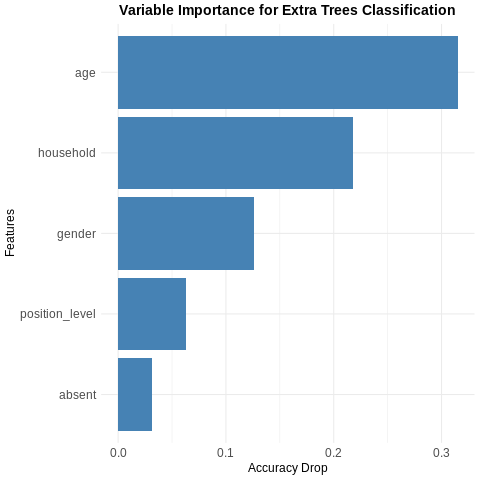

In [ ]:
%%R
ggplot(var_imp_et, aes(x = reorder(Variable, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Add color
  coord_flip() +
  labs(title = "Variable Importance for Extra Trees Classification",
       x = "Features",
       y = "Accuracy Drop") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 12)
  )

### Regression Example




#### Dataa and Data Processing

In [ ]:
%%R
# Load and preprocess data
mf <- read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/gp_soil_data.csv")
df <- mf %>% select(SOC, DEM, Slope, Aspect, TPI, KFactor, SiltClay, MAT, MAP, NDVI, NLCD, FRG)
df$NLCD <- as.factor(df$NLCD)
df$FRG <- as.factor(df$FRG)

# Check for missing values
if (anyNA(df)) {
  cat("Missing values detected. Removing rows with NA.\n")
  df <- na.omit(df)
}

# Split data (70% train, stratified by NLCD and FRG)
seeds <- 11076
set.seed(seeds)
train <- ddply(df, .(NLCD, FRG), function(., seed) {
  set.seed(seed)
  if (nrow(.) > 0) .[sample(nrow(.), trunc(nrow(.) * 0.7)), ] else .
}, seed = 101)
test <- ddply(df, .(NLCD, FRG), function(., seed) {
  set.seed(seed)
  if (nrow(.) > 0) .[-sample(nrow(.), trunc(nrow(.) * 0.7)), ] else .
}, seed = 101)

# Ensure train and test have data
if (nrow(train) == 0 || nrow(test) == 0) stop("Train or test set is empty after splitting.")

# Scale numerical features
numerical_cols <- c("DEM", "Slope", "Aspect", "TPI", "KFactor", "SiltClay", "MAT", "MAP", "NDVI")
train[numerical_cols] <- scale(train[numerical_cols])
test[numerical_cols] <- scale(test[numerical_cols])

# Encode categorical variables (NLCD, FRG) into dummy variables
combined <- rbind(cbind(train, set = "train"), cbind(test, set = "test"))
# Ensure all levels are consistent
combined$NLCD <- factor(combined$NLCD, levels = levels(df$NLCD))
combined$FRG <- factor(combined$FRG, levels = levels(df$FRG))
dummy_matrix <- model.matrix(~ NLCD + FRG - 1, data = combined)
train_dummy <- dummy_matrix[combined$set == "train", ]
test_dummy <- dummy_matrix[combined$set == "test", ]

# Combine numerical and dummy variables
x_train <- as.matrix(cbind(train[numerical_cols], train_dummy))
x_test <- as.matrix(cbind(test[numerical_cols], test_dummy))
y_train <- train$SOC
y_test <- test$SOC

Rows: 467 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Extra Trees function (for regression)

In [ ]:
%%R
# 1) Extra Trees function (for regression)
extraTrees <- function(x, y, ntree = 100, mtry = floor(sqrt(ncol(x))), nodesize = 5) {
  # Validate inputs
  if (anyNA(x) || anyNA(y)) stop("Input data contains missing values.")
  if (nrow(x) != length(y)) stop("Rows in x must match length of y.")

  bootstrap_sample <- function(data, target) {
    indices <- sample(nrow(data), replace = TRUE)
    list(data = data[indices, ], target = target[indices])
  }

  select_features <- function(n_features, k) sample(n_features, k)

  feature_importance <- numeric(ncol(x))
  names(feature_importance) <- colnames(x)

  build_tree <- function(data, target) {
    build_node <- function(data, target, depth) {
      # Check for valid data
      if (!is.matrix(data) || nrow(data) == 0 || anyNA(data) || length(target) == 0) {
        return(list(leaf = TRUE, prediction = mean(target, na.rm = TRUE)))
      }
      if (depth > 10 || nrow(data) <= nodesize) {
        return(list(leaf = TRUE, prediction = mean(target, na.rm = TRUE)))
      }

      features <- select_features(ncol(data), mtry)
      best_feature <- NULL
      best_threshold <- NULL
      best_split <- NULL
      best_mse <- Inf

      for (f in features) {
        values <- data[, f]
        if (length(unique(values)) > 1) {
          threshold <- runif(1, min(values), max(values))
          left <- data[, f] <= threshold
          if (sum(left) > 0 && sum(!left) > 0) {
            left_target <- target[left]
            right_target <- target[!left]
            mse <- mean((left_target - mean(left_target, na.rm = TRUE))^2, na.rm = TRUE) +
                   mean((right_target - mean(right_target, na.rm = TRUE))^2, na.rm = TRUE)
            if (mse < best_mse && !is.na(mse)) {
              best_mse <- mse
              best_feature <- f
              best_threshold <- threshold
              best_split <- list(left_data = data[left, ], left_target = left_target,
                                 right_data = data[!left, ], right_target = right_target)
            }
          }
        }
      }

      if (is.null(best_feature)) {
        return(list(leaf = TRUE, prediction = mean(target, na.rm = TRUE)))
      }

      feature_importance[best_feature] <<- feature_importance[best_feature] + 1
      left_tree <- build_node(best_split$left_data, best_split$left_target, depth + 1)
      right_tree <- build_node(best_split$right_data, best_split$right_target, depth + 1)

      list(leaf = FALSE, feature = best_feature, threshold = best_threshold,
           left = left_tree, right = right_tree)
    }
    build_node(data, target, 0)
  }

  trees <- lapply(1:ntree, function(i) {
    sample <- bootstrap_sample(x, y)
    build_tree(sample$data, sample$target)
  })

  list(trees = trees, feature_importance = feature_importance)
}

#### Prediction Function

In [ ]:
%%R
# 2) Prediction function
predict_extraTrees <- function(model, x) {
  predict_tree <- function(tree, row) {
    if (tree$leaf) return(tree$prediction)
    if (row[tree$feature] <= tree$threshold) predict_tree(tree$left, row)
    else predict_tree(tree$right, row)
  }

  predictions <- sapply(model$trees, function(tree) apply(x, 1, function(row) predict_tree(tree, row)))
  rowMeans(predictions, na.rm = TRUE)
}

#### Fit the Extra Tree Model

In [ ]:
%%R
# 3) Train the model
set.seed(seeds)
et_model <- extraTrees(x_train,
                       y_train,
                       ntree = 100,
                       mtry = floor(sqrt(ncol(x_train))),
                       nodesize = 5)

#### Prediction and Evaluation

In [ ]:
%%R
# 4) Prediction and evaluation
y_pred <- predict_extraTrees(et_model, x_test)
rmse <- sqrt(mean((y_pred - y_test)^2, na.rm = TRUE))
r2 <- cor(y_test, y_pred, use = "complete.obs")^2
cat("Test RMSE:", round(rmse, 3), "\n")
cat("Test R²:", round(r2, 3), "\n")

Test RMSE: 4.246 
Test R²: 0.448 


### Hyperparameter Tuning

Hyperparameter tuning is an essential step in optimizing the performance of Extra Trees models. The key hyperparameters to tune include:

-   `ntree`: Number of trees in the ensemble. More trees can improve performance but increase computation time.
-   `mtry`: Number of features to consider at each split. A smaller value can reduce overfitting, while a larger value can increase model complexity.
-   `nodesize`: Minimum number of samples required to split a node. Larger values can prevent overfitting.


In [ ]:
%%R
# 3) Custom 5-fold cross-validation function
create_folds <- function(y, k = 5) {
  n <- length(y)
  indices <- sample(n)
  fold_sizes <- rep(floor(n / k), k)
  fold_sizes[1:(n %% k)] <- fold_sizes[1:(n %% k)] + 1
  folds <- list()
  start <- 1
  for (i in 1:k) {
    end <- start + fold_sizes[i] - 1
    folds[[i]] <- indices[start:end]
    start <- end + 1
  }
  folds
}

# 5) Train final model with best parameters
set.seed(seeds)
et_model <- extraTrees(x_train, y_train,
                       ntree = best_params$ntree,
                       mtry = best_params$mtry,
                       nodesize = best_params$nodesize)

# 6) Prediction and evaluation on test set
y_pred <- predict_extraTrees(et_model, x_test)
rmse <- compute_rmse(y_test, y_pred)
r2 <- cor(y_test, y_pred, use = "complete.obs")^2
cat("\nTest RMSE:", round(rmse, 3), "\n")
cat("Test R²:", round(r2, 3), "\n")

Params: ntree=50, mtry=4, nodesize=1 | CV RMSE=3.926, CV R²=0.388
Params: ntree=100, mtry=4, nodesize=1 | CV RMSE=3.925, CV R²=0.395
Params: ntree=500, mtry=4, nodesize=1 | CV RMSE=3.883, CV R²=0.407
Params: ntree=50, mtry=6, nodesize=1 | CV RMSE=4.027, CV R²=0.353
Params: ntree=100, mtry=6, nodesize=1 | CV RMSE=3.987, CV R²=0.378
Params: ntree=500, mtry=6, nodesize=1 | CV RMSE=3.975, CV R²=0.379
Params: ntree=50, mtry=9, nodesize=1 | CV RMSE=4.080, CV R²=0.351
Params: ntree=100, mtry=9, nodesize=1 | CV RMSE=4.099, CV R²=0.340
Params: ntree=500, mtry=9, nodesize=1 | CV RMSE=4.088, CV R²=0.349
Params: ntree=50, mtry=4, nodesize=5 | CV RMSE=3.915, CV R²=0.390
Params: ntree=100, mtry=4, nodesize=5 | CV RMSE=3.912, CV R²=0.399
Params: ntree=500, mtry=4, nodesize=5 | CV RMSE=3.892, CV R²=0.407
Params: ntree=50, mtry=6, nodesize=5 | CV RMSE=4.024, CV R²=0.359
Params: ntree=100, mtry=6, nodesize=5 | CV RMSE=3.953, CV R²=0.386
Params: ntree=500, mtry=6, nodesize=5 | CV RMSE=3.983, CV R²=0.377


#### Hyperparameter tuning with grid search

In [ ]:
%%R
# Function to compute RMSE
compute_rmse <- function(y_true, y_pred) {
  sqrt(mean((y_true - y_pred)^2, na.rm = TRUE))
}

# 4) Hyperparameter tuning with grid search
set.seed(seeds)
n_features <- ncol(x_train)
param_grid <- expand.grid(
  ntree = c(50, 100, 500),
  mtry = c(floor(sqrt(n_features)), floor(n_features/3), floor(n_features/2)),
  nodesize = c(1, 5, 10)
)


#### Perform 3-fold cross-validation

In [ ]:
%%R
# Perform 3-fold cross-validation
k <- 3
folds <- create_folds(y_train, k)results <- data.frame(param_grid, RMSE = NA, R2 = NA)

for (i in 1:nrow(param_grid)) {
  ntree <- param_grid$ntree[i]
  mtry <- param_grid$mtry[i]
  nodesize <- param_grid$nodesize[i]

  cv_rmse <- numeric(k)
  cv_r2 <- numeric(k)

  for (j in 1:k) {
    val_idx <- folds[[j]]
    train_idx <- setdiff(1:length(y_train), val_idx)

    x_train_cv <- x_train[train_idx, ]
    y_train_cv <- y_train[train_idx]
    x_val_cv <- x_train[val_idx, ]
    y_val_cv <- y_train[val_idx]

    model_cv <- extraTrees(x_train_cv, y_train_cv, ntree = ntree, mtry = mtry, nodesize = nodesize)
    y_pred_cv <- predict_extraTrees(model_cv, x_val_cv)

    cv_rmse[j] <- compute_rmse(y_val_cv, y_pred_cv)
    cv_r2[j] <- cor(y_val_cv, y_pred_cv, use = "complete.obs")^2
  }

  results$RMSE[i] <- mean(cv_rmse, na.rm = TRUE)
  results$R2[i] <- mean(cv_r2, na.rm = TRUE)
  cat(sprintf("Params: ntree=%d, mtry=%d, nodesize=%d | CV RMSE=%.3f, CV R²=%.3f\n",
              ntree, mtry, nodesize, results$RMSE[i], results$R2[i]))
}


#### Select best parameters

In [ ]:
%%R
# Select best parameters
best_idx <- which.min(results$RMSE)
best_params <- param_grid[best_idx, ]
cat("\nBest Parameters:\n")
print(best_params)
cat(sprintf("Best CV RMSE: %.3f\nBest CV R²: %.3f\n", results$RMSE[best_idx], results$R2[best_idx]))


Best Parameters:
  ntree mtry nodesize
3   500    4        1
Best CV RMSE: 3.883
Best CV R²: 0.407


#### Train final model with best parameters

In [ ]:
%%R
# Train final model with best parameters
set.seed(seeds)
et_model_final <- extraTrees(x_train, y_train,
                       ntree = best_params$ntree,
                       mtry = best_params$mtry,
                       nodesize = best_params$nodesize)



#### Prediction and Evaluation

In [ ]:
%%R
# Prediction and evaluation on test set
y_pred <- predict_extraTrees(et_model_final, x_test)
rmse <- compute_rmse(y_test, y_pred)
r2 <- cor(y_test, y_pred, use = "complete.obs")^2
cat("\nTest RMSE:", round(rmse, 3), "\n")
cat("Test R²:", round(r2, 3), "\n")


Test RMSE: 4.174 
Test R²: 0.466 


## Summary and Conclusion

Extra Trees is a powerful and efficient ensemble method that can be applied to various machine learning tasks, offering a balance between speed and robustness. It is particularly useful for high-dimensional datasets and can handle both classification and regression problems effectively. In this tutorial , we explored the implementation of Extra Trees in R using the {extraTrees} package, demonstrating its application on both classification and regression tasks. We also discussed the importance of feature selection and model evaluation metrics, providing a comprehensive overview of how to leverage Extra Trees for predictive modeling.  At the end, we computed feature importance using permutation importance, which helps identify the most influential features in the model. This information can guide further analysis and feature engineering efforts.

## References


1.  Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction* (2nd ed.). Springer.\

2.  Geurts, P., Ernst, D., & Wehenkel, L. (2006). Extremely randomized trees. *Machine Learning*, 63(1), 3–42. https://doi.org/10.1007/s10994-006-6226-1

3.  CRAN. (2023). *extraTrees: Extremely Randomized Trees (ExtraTrees) for Regression and Classification*. R package version 0.8-12. https://cran.r-project.org/web/packages/extraTrees/index.html

4.  Sim, J. (2016). *Extremely Randomized Trees with R*. R-bloggers. https://www.r-bloggers.com/2016/04/extremely-randomized-trees-with-r/